<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Programming DBSCAN From Scratch

_Authors: Kiefer Katovich (SF)_

---

### Learning Objectives

- Learn to define the DBSCAN algorithm.
- Understand the parameters that must be provided to DBSCAN.
- Program the DBSCAN algorithm from scratch using object-oriented Python.
- Build your own interactive visual in Matplotlib to test your implementation.


### Lesson Guide
- [Density-Based Spatial Clustering of Applications With Noise (DBSCAN)](#intro)
- [DBSCAN Algorithm](#algo)
- [Building DBSCAN in Parts](#parts)
    - [Step 1: Create Some Fake Clustered Data](#step1)
    - [Step 2: Make the Skeleton of the `DBSCAN` Class](#step2)
    - [Step 3: Write the `fit()` Function](#step3)
    - [Step 4: Write the Function to Find Neighbors](#step4)
    - [Step 5: Write the Function to Expand the Clusters](#step5)
- [Full DBSCAN Code Without Comments](#fullcode)
- [Plotting DBSCAN Interactively](#interact)
    - [Rewrite the Plotting Function to Accept Cluster Labels](#rewrite)
    - [Write a Function That Accepts `eps` and `min_samples` and Fits DBSCAN](#plot-fit)
    - [Write the `interact()` Function for the IPython Widget](#int-func)

<a id='intro'></a>
## Density-Based Spatial Clustering of Applications With Noise (DBSCAN)

---

DBSCAN is a clustering algorithm that groups data points together based on density. Nearby points get assigned to a common cluster while outlier points get assigned to their own clusters. DBSCAN is effective and attractive for its simplicity and minimal predetermined parameters.

There are only two parameters that need to be specified for DBSCAN:

    Epsilon: A minimum distance between points that can define a "connection."
    
    Minimum samples: The minimum number of points that a point needs to have as neighbors to define it as a "core sample."
    
**Core samples** are, by design, the points that lie internally within a cluster. 

**Non-core samples** do not meet the minimum required neighboring points but are still connected to a cluster defined by a core sample or samples. These points lie on the edges of a cluster.

**Outliers** are points that do not meet the distance criteria for a cluster nor the minimum neighbors to form a new cluster.

<a id='algo'></a>
## The DBSCAN Algorithm

---

The DBSCAN algorithm proceeds iteratively through the points in a data set, determining whether they are core samples, non-core samples or outliers via the distance measure and minimum samples specified.

Here is the pseudocode algorithm that we'll be coding up ourselves:


```
DBSCAN(D, eps, MinPts) {
   C = 0
   for each point P in data set D {
      if P is visited
         continue next point
      mark P as visited
      NeighborPts = regionQuery(P, eps)
      if sizeof(NeighborPts) < MinPts
         mark P as NOISE
      else {
         C = next cluster
         expandCluster(P, NeighborPts, C, eps, MinPts)
      }
   }
}

expandCluster(P, NeighborPts, C, eps, MinPts) {
   add P to cluster C
   for each point P' in NeighborPts { 
      if P' is not visited {
         mark P' as visited
         NeighborPts' = regionQuery(P', eps)
         if sizeof(NeighborPts') >= MinPts
            NeighborPts = NeighborPts joined with NeighborPts'
      }
      if P' is not yet member of any cluster
         add P' to cluster C
   }
}

regionQuery(P, eps)
   return all points within P's eps-neighborhood (including P)
```

<a id='parts'></a>

## Building DBSCAN in Parts

---

We can roll our own DBSCAN following the pseudocode above. Doing it piece by piece will make it clear how the algorithm works.

<a id='step1'></a>
### Step 1) Create some fake clustered data.

Scikit-learn has some nice data generation functions in its `sklearn.datasets` module. We've loaded a handful of them below. You can use them to easily create clustered data to test clustering algorithms.

Generate the data set and plot it out.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Data set generators:
from sklearn.datasets import make_biclusters, make_blobs, make_circles, make_moons

In [3]:
X, bloby = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.5)

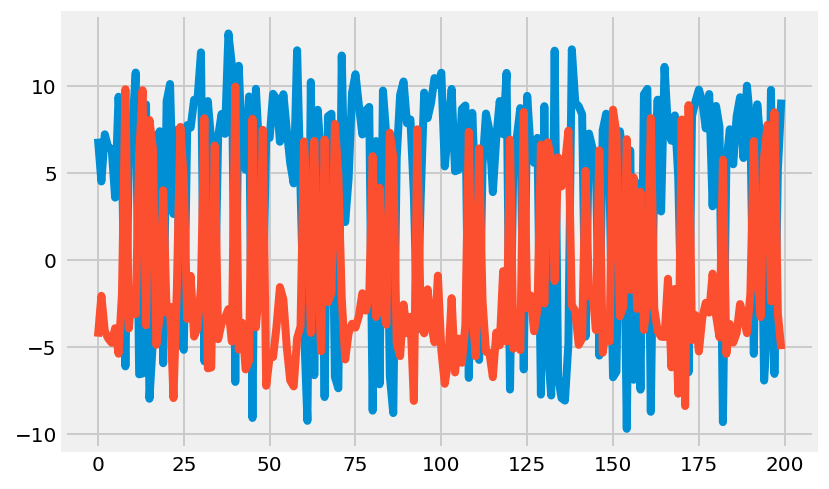

In [6]:
plt.plot(X)

---
<a id='step2'></a>
### Step 2) Make the skeleton of the `DBSCAN` class.

Start laying out the blueprint for how DBSCAN will work. To begin, we'll need:

1) An `__init__()` function to initialize the class with the `eps` and `min_samples` arguments.
2) A `fit()` function (empty for now) that will run DBSCAN on the data.

In [5]:
# Class skeleton:

---
<a id='step3'></a>
### Step 3) Write the `fit()` function (equivalent to the `DBSCAN()` function in pseudocode).

Our `fit()` function will follow the logic of the `DBSCAN()` function in the pseudocode above (copied here). In general, think about what variables are best suited to be class attributes when building classes. It can take practice to get the hang of it.

```
DBSCAN(D, eps, MinPts) {
   C = 0
   for each point P in data set D {
      if P is visited
         continue next point
      mark P as visited
      NeighborPts = regionQuery(P, eps)
      if sizeof(NeighborPts) < MinPts
         mark P as NOISE
      else {
         C = next cluster
         expandCluster(P, NeighborPts, C, eps, MinPts)
      }
   }
}
```

In [6]:
# We can use scikit-learn's sklearn.metrics.pairwise.euclidean_distances 
# to find the distances between points, rather than recoding
# this ourselves.
from sklearn.metrics.pairwise import euclidean_distances

# Add the fit() function to the class.

---
<a id='step4'></a>
### Step 4) Write the function to find neighbors.

We need to convert this function in the pseudocode to a class function:

```
regionQuery(P, eps)
   return all points within P's eps-neighborhood (including P)
```

We've already named this `self.find_region_points(i)`, so we'll refer to it this way. 

In [7]:
# Add the neighbor finder.
    

---
<a id='step5'></a>
### Step 5) Write the function to expand the clusters.

The final function (and the one that actually assigns our clusters) is defined by the pseudocode as:

```
expandCluster(P, NeighborPts, C, eps, MinPts) {
   add P to cluster C
   for each point P' in NeighborPts { 
      if P' is not visited {
         mark P' as visited
         NeighborPts' = regionQuery(P', eps)
         if sizeof(NeighborPts') >= MinPts
            NeighborPts = NeighborPts joined with NeighborPts'
      }
      if P' is not yet member of any cluster
         add P' to cluster C
   }
}
```

Essentially, the function takes a point ID, the neighboring point IDs, the cluster number, the minimum distance, and the minimum points and figures out what cluster a point should be in based on those criteria. 

We've already named this function in the `fit()` function as `expand_cluster(i, neighbors)`. We only need to pass in the current point and neighboring points, as we're storing all of the other information the function needs as class attributes.

In [8]:
# Add a function to expand the clusters.

<a id='fullcode'></a>
## Full `DBSCAN` Code Without Comments

---

Without comments, the code is pretty concise. Again, DBSCAN is a powerful clustering algorithm but also appealing for its simplicity and the intuitive way it finds points.

In [9]:
# See the solution for the full code without comments.
    

<a id='interact'></a>
## Plotting DBSCAN Interactively

---

We can look at how the `eps` and `min_samples` parameters affect DBSCAN's decisions when assigning clusters. This is also a good opportunity to go over how to make interactive visualizations with IPython widgets.

<a id='rewrite'></a>
### Rewrite the Plotting Function to Accept Cluster Labels and Color the Points Accordingly

In [10]:
# Adjust the plotting function

---
<a id='plot-fit'></a>
### Write a Function That Accepts `eps` and `min_samples` as Keyword Arguments, Fits DBSCAN, and Calls the Plotting Function

Don't pass `X` into the function. We’ll just use the "global" `x` defined earlier in the Jupyter Notebook.

In [11]:
# Add the arguments to the function.

---
<a id='int-func'></a>
### Write the `interact()` Function That Creates the IPython Widget.

Your `interact()` function defines the sliders (or other inputs you want to be interactive) and then makes a call to `widgets.interact(function, *interactive objects)` where:

- `function` is the function that takes the values coming out of the interactive slider objects (we wrote it just before; it takes `eps` and `min_samples`).
- The interactive objects, in our case, will be a `widgets.FloatSlider` for `eps` and a `widgets.IntSlider` for `min_samples`.

For more information, review this notebook:

https://github.com/ipython/ipywidgets/blob/master/docs/source/examples/Index.ipynb

In [12]:
# Write the interact function.

In [13]:
# cluster_interact()